#### GRU Forward Pass

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Data
T = 10 # time steps
input_size = 1
hidden_size = 3

X = np.random.randn(T, input_size)

# GRU Weights
def init_gru():
    return (
        np.random.randn(hidden_size, input_size),
        np.random.randn(hidden_size, hidden_size),
        np.zeros((hidden_size, 1))
    )

Wz, Uz, bz = init_gru() # Update gate
Wr, Ur, br = init_gru() # Reset gate
Wh, Uh, bh = init_gru() # Candidate

# Activations
sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = np.tanh

h = np.zeros((hidden_size,1))
H_gru = []

print("\nGRU Hidden States:\n")

for t in range(T):
    x = X[t].reshape(-1,1)

    z = sigmoid(Wz @ x + Uz @ h + bz)
    r = sigmoid(Wr @ x + Ur @ h + br)

    h_hat = tanh(Wh @ x + Uh @ (r * h) + bh)
    h = (1 - z) * h + z * h_hat

    H_gru.append(h.flatten())
    print(f"t={t} | h={h.flatten()}")

H_gru = np.array(H_gru)


GRU Hidden States:

t=0 | h=[ 0.17144133 -0.23961416  0.05478977]
t=1 | h=[ 0.01145493 -0.03976994  0.07271478]
t=2 | h=[ 0.21742452 -0.28960141  0.1013161 ]
t=3 | h=[ 0.40476473 -0.45135984  0.17456631]
t=4 | h=[ 0.02392713 -0.14940911  0.16740304]
t=5 | h=[-0.03933192  0.04600085  0.10296894]
t=6 | h=[ 0.24422699 -0.27134749  0.22532499]
t=7 | h=[ 0.30683666 -0.39273504  0.19079354]
t=8 | h=[-0.07877729 -0.00052297  0.17234241]
t=9 | h=[ 0.17877533 -0.25308947  0.12287345]


#### GRU Visualizations

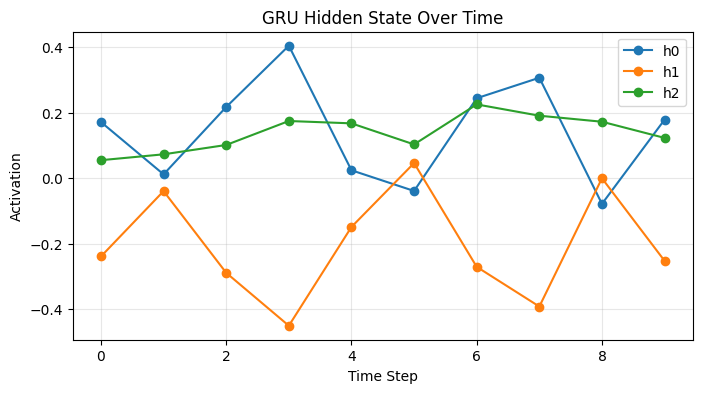

In [7]:
# 1. Hidden state over time
plt.figure(figsize=(8,4))
for i in range(hidden_size):
    plt.plot(H_gru[:,i], marker="o", label=f"h{i}")

plt.title("GRU Hidden State Over Time")
plt.xlabel("Time Step")
plt.ylabel("Activation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

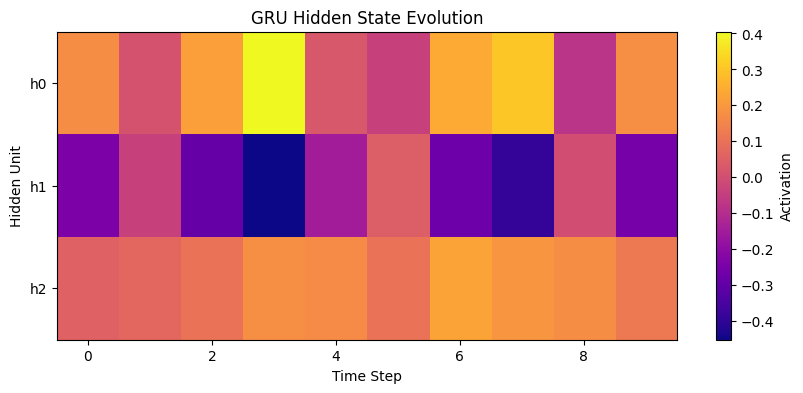

In [8]:
# 2. Hidden state headmap
plt.figure(figsize=(10,4))
plt.imshow(H_gru.T, aspect="auto", cmap="plasma")
plt.colorbar(label="Activation")
plt.xlabel("Time Step")
plt.ylabel("Hidden Unit")
plt.title("GRU Hidden State Evolution")
plt.yticks(range(hidden_size), [f"h{i}" for i in range(hidden_size)])
plt.show()